In [1]:
from germansentiment import SentimentModel
import datetime
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm

In [2]:
plt.rcParams['figure.figsize'] = (24, 14)

In [3]:
model = SentimentModel()

In [4]:
full_chat_log = open('datasets/chat.txt', 'r').readlines()
dates = [e.split(',')[0] for e in full_chat_log]

In [5]:
# merge lines not starting with a date with the previous line
# and create a new dates list
new_chat_log = [] 
last_chat = []
new_dates = []

for i, date in enumerate(dates): 
    try: 
        datetime.datetime.strptime(date, '%d/%m/%Y')  
        
        new_dates.append(date)
        msg = ' '.join(last_chat)
        msg = ':'.join(msg.split(':')[2:])
        new_chat_log.append(msg.strip())
        last_chat.clear()
        
        last_chat.append(full_chat_log[i])
    except ValueError as err:
        last_chat.append(full_chat_log[i])

full_chat_log, dates = new_chat_log[2:], new_dates[2:]

In [6]:
# loop through each msg and date
# and generate a nested list for all messages of the same date
last_date = ''
messages = []
new_dates = []

current_messages = []
for msg, date in zip(full_chat_log, dates):
    current_messages.append(msg)
    
    if last_date != date:
        messages.append(current_messages)
        new_dates.append(date)
        current_messages = []
    
    last_date = date

dates = new_dates

In [7]:
# get number length of each date
messages_per_day = []
for day_msgs in messages:
    messages_per_day.append(len(day_msgs))
    
messages_per_day = np.array(messages_per_day)

In [8]:
# top ten days of messages (index)
messages_per_day.argsort()[-10:][::-1]

array([110, 157, 104, 317, 167, 161, 103, 158, 109, 159])

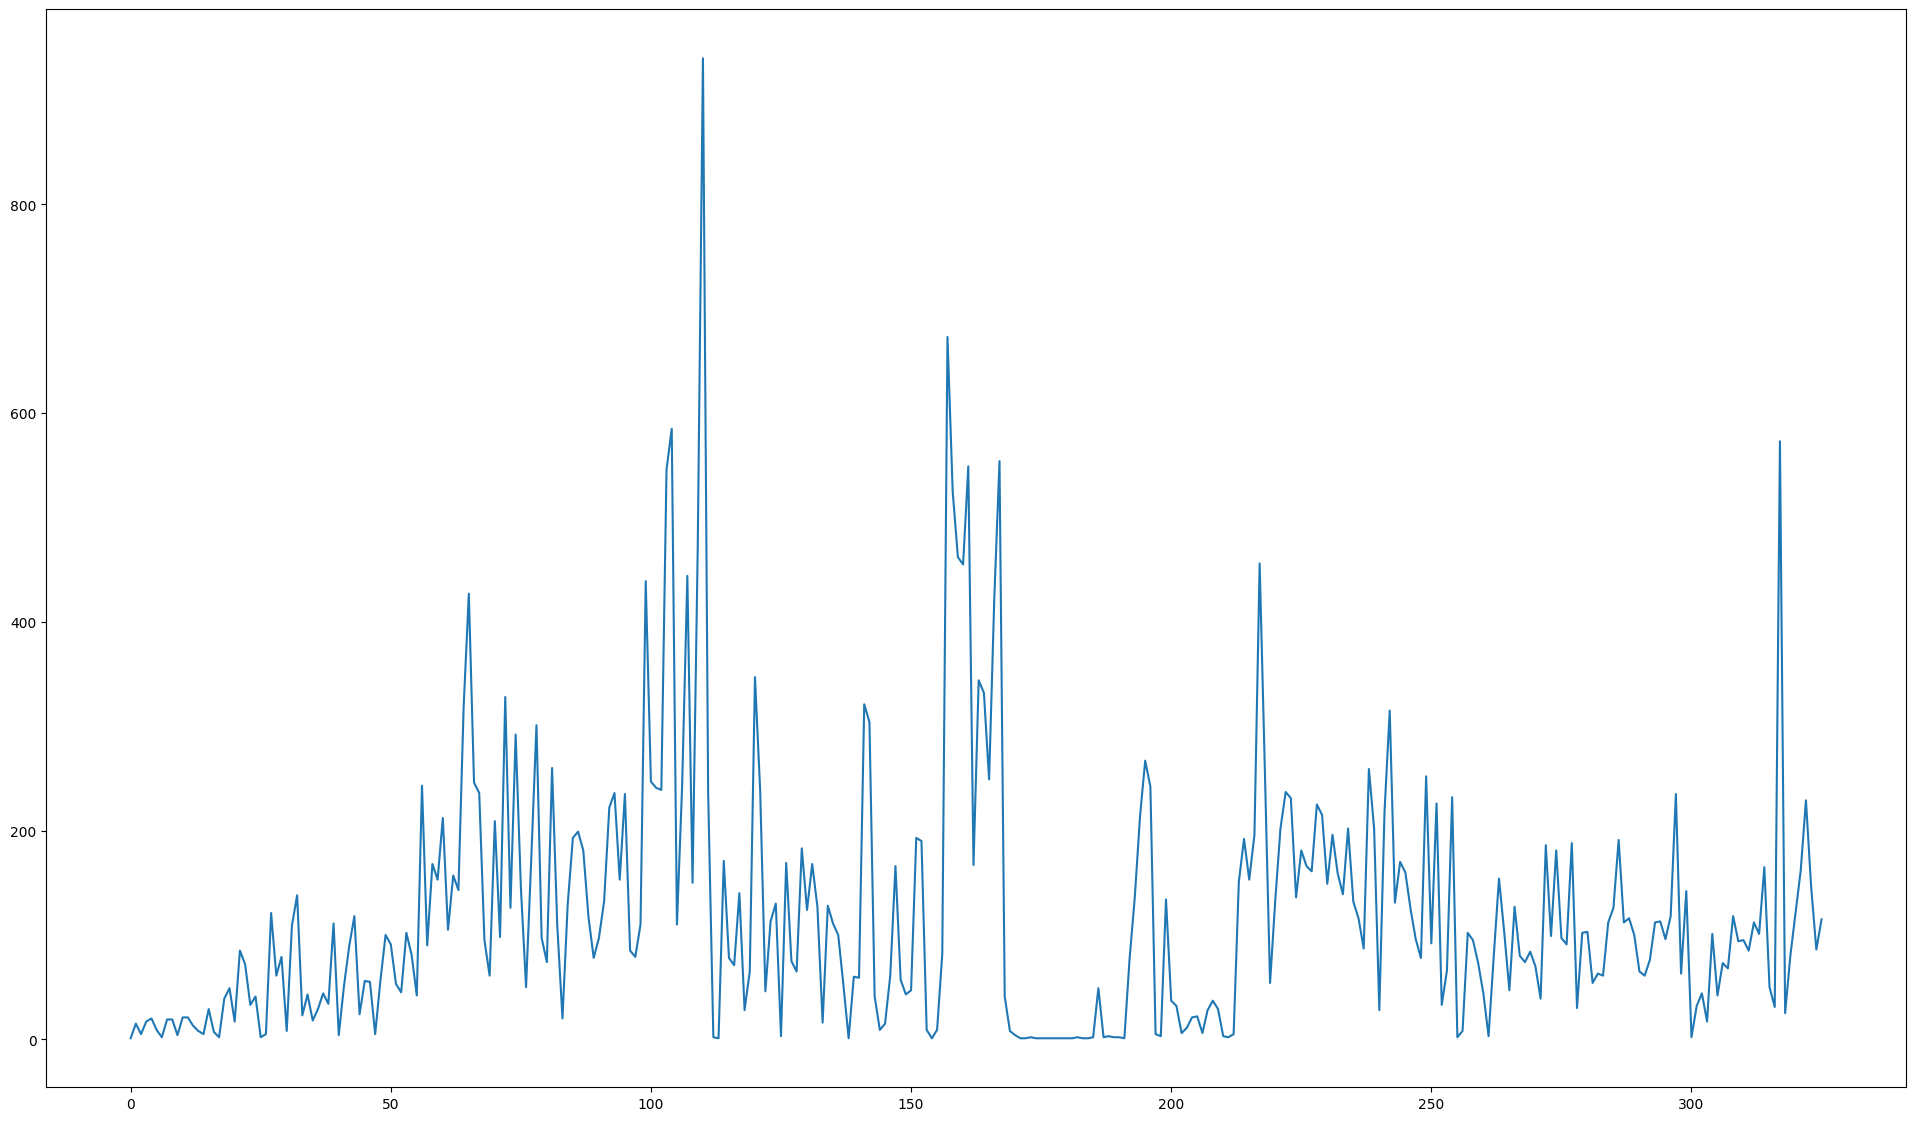

In [9]:
plt.plot(messages_per_day)

In [ ]:
# get the average sentiment of each day
sentiment_val = {
    'negative': -1,
    'neutral': 0,
    'positive': 1
}

avg_sentiments = np.zeros(len(messages))

for i in tqdm(range(len(messages))):  
    day_sents = model.predict_sentiment(messages[i])
    day_score = 0
    
    for sent in day_sents:
        day_score += sentiment_val[sent]
    
    avg_sentiments[i] = day_score / len(messages[i])

  0%|          | 0/326 [00:00<?, ?it/s]

In [ ]:
plt.plot(avg_sentiments)

In [ ]:
!git add -A
!git commit -m "sentiment analysis results (whatsapp chat)"
!git push